In [ ]:
## 패키지 설치
pip install nltk konlpy pandas networkx gensim

In [ ]:
## 코랩 한글 깨짐 현상 해결
## [방법 1]
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
from pandas import DataFrame

In [2]:
## 1. 
## [함수 정의] #################################################################
## 탐색하고자 하는 대상이 단어인가 문서인가에 따라 TF와 DF로 나뉨 ##############
## tf (term frequency) : 1개 문서 내 특정 단어 빈도
def tf(term, document):
    return document.count(term)


docs = []

## df (document frequency) : 특정 단어가 나타나는 문서의 개수
def df(term):
    df = 0
    for doc in docs:
        df += term in doc
    return df

## IDF (Inverse Document Frequency) : DF에서 역수 변환
## d : 문서, t : 단어, n : 문서 총 개수
def idf(term):
    return log(N/(df(term)+1))

## tf_idf : 많이 등장하는 단어에 패널티를 주고 단어 빈도의 스케일을 맞춰주는 방법
## 수식으로는 TF-IDF = tf*idf
def tf_idf(term, document):
    return tf(term, document) * idf(term)

In [ ]:
####################################################################################################
## Code start ######################################################################################
####################################################################################################
from nltk.tokenize import sent_tokenize
from konlpy.corpus import kolaw
from konlpy.tag import *
from pandas import DataFrame
from math import log

import konlpy
import nltk
import pandas as pd

## 파일 읽어오기 #######################################################
## 1) 코랩에 파일 업로드
# from google.colab import files
# myfile = files.upload()

## 2) 4기 csv 파일 읽어오기
current_work = 'time_4.csv'

table_4 = pd.read_csv(current_work)
# table_4
#type(table_4)        ## DataFrame

In [7]:
row, col = table_4.shape

news_content = table_4['기사제목']  ## Object
#news_content

news_content_list = list(news_content)
# news_content_list

## 자료형 변환 : list -> str
# news_content_str = ' '.join(news_content_list)
news_content_str = ' '.join(map(str, news_content_list))

In [8]:
'''
nouns : 명사 추출
morphs : 형태소 추출
pos : 품사 부착
'''
komoran = Komoran()

## 메모리 설정
# konlpy.jvm.init_jvm(jvmpath=None, max_heap_size=1024)

## 형태소와 품사 추출 ######################################################################
# pos = komoran.pos(news_content_str)
# pos

'''
NNB: '의존 명사',
NNG: '일반 명사',
NNP: '고유 명사',
NP : '대명사',
'''

## 7분 29초 소요 ############################################################################

"\nNNB: '의존 명사',\nNNG: '일반 명사',\nNNP: '고유 명사',\nNP : '대명사',\n"

In [ ]:
kopus = []
token_result = []

#############################################################################################################
## 불용어 처리 : 단어 제외하기 ########################################################################

stop_word = ['로나', '19', '째 코', '10', '20', '11', '100', '진자', '50', '위해', '00', '30', '40', '60', '바이', '12', '17', '18', '종합']

for line in news_content_list:
    pos = komoran.pos(line)
    NN = [element[0] for element in pos if element[1] in ('NNP', 'NNG')]
    # print('NN >>', NN)

    NN_copy = NN[:]

    for N in NN:
      # print('N >>', N)

      if N in stop_word:
        NN_copy.remove(N)

      if len(N) == 1:
        NN_copy.remove(N)

    # print('NN : 불용어 삭제 후 >>', NN)

    token_result.append(NN_copy)
    kopus.extend(NN_copy)
        
# print('=' * 100)    
# kopus


In [41]:
#######################################################################################################
# docs = list(test_file['기사내용'])
docs = news_content_list

# ## 총 문서 수
# N = len(docs)
N = row

## 중복 제거한 형태소 #################################################################################
voca = list(set(kopus))
# print('중복 제거한 형태소 개수 >>', len(voca))
# voca

# print(docs)
print('docs 수 >>', len(docs))
print('N 수 >>', N)
print('형태소 개수 : voca 수 >>', len(voca))

## IDF -------------------------------------------------------------------------------
# IDE_result = []

# for t in final_voca:
#     IDE_result.append(idf(t))

# IDE_result

# idf_ = pd.DataFrame(IDE_result, index=final_voca, columns=["IDF"])
# idf_
# idf_.IDF.sort_values(ascending=False)[:30]

## tf_idf -----------------------------------------------------------------------------
TF_IDE_result = []

for word in voca:
#     print(word)
    TF_IDE_result.append(tf_idf(word, news_content_str))
    
# TF_IDE_result

tf_idf_ = pd.DataFrame(TF_IDE_result, index=voca, columns=["IDF"])
# tf_idf_

tf_idf_final = tf_idf_.sort_values(by='IDF', ascending=False)[:30]  ## 최종 30개 형태소 추출
tf_idf_final.to_csv(f'{current_work}_tf_idf.csv')
print(f'{current_work}_tf_idf.csv 파일 저장 완료!!')

docs 수 >> 52000
N 수 >> 52000
형태소 개수 : voca 수 >> 11701
time_4.csv_tf_idf.csv 파일 저장 완료!!


In [42]:
tf_idf_final

,IDF
확진,19165.984577
백신,13991.619490
신규,13455.536282
접종,13250.890801
발생,8498.559308
검사,8334.646506
위드,8204.462297
확산,8107.604497
감염,7820.090201
치료,7814.518115


In [43]:
tf_idf_final.index

Index(['확진', '백신', '신규', '접종', '발생', '검사', '위드', '확산', '감염', '치료', '지원', '방역',
       '추가', '치료제', '속보', '최다', '예방', '극복', '사망', '누적', '대응', '오후', '수도', '서울',
       '국내', '회복', '정부', '의료', '추석', '임상'],
      dtype='object')

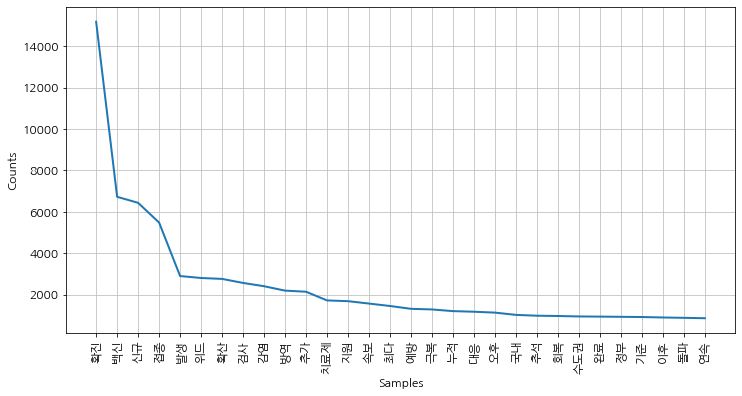

워드 클라우드 저장 완료 !!


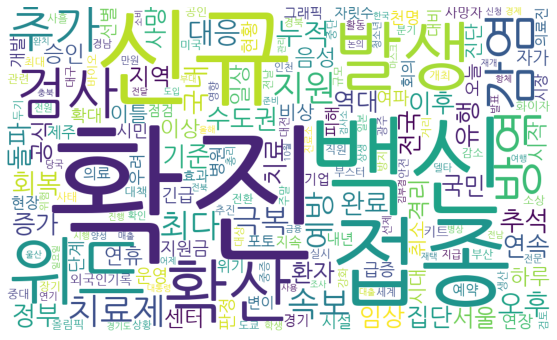

In [45]:
############################################################################################
## koNLPy의 형태소 분석기와 NLTK의 Text 클래스를 결합하여 NLTK 기능을 사용할 수도 있다.
############################################################################################
from nltk import Text
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# plt.rcParams['font.family'] ='NanumGothic'
plt.rc('font', family='NanumGothic') ## 글꼴
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.xlabel('키워드')

kopus_corona_except = [k for k in kopus if k != '코로나']
text = Text(kopus_corona_except, name="단어")

# text = Text(kopus, name="단어")

#text.vocab()
chart = text.plot(30)

# chart.savefig(f'{current_work}_chart.png')
# print('이미지 저장 완료!!')

##############################################################################################
## wordcloud #################################################################################
##############################################################################################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

plt.rc('font', family='NanumGothic') ## 글꼴
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(text.vocab()))
plt.axis("off")

plt.savefig(f'{current_work}_wordcloud.png')
print('워드 클라우드 저장 완료 !!')

In [46]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

## Word2Vec 훈련시키기 #####################################################################################
#type(kopus_result) ##list
# word2vec_model = Word2Vec(sentences=kopus_result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
model = Word2Vec(sentences=token_result, size=100, window=5, min_count=2, workers=4, sg=1)


In [47]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(8202, 100)

In [48]:
model.wv.vectors

array([[-0.22517914,  0.03452606,  0.09022953, ...,  0.353571  ,
         0.20730866,  0.02693561],
       [-1.0466572 ,  0.11138988, -0.1611236 , ...,  0.37627798,
         0.8990523 ,  0.3190945 ],
       [-0.14849307,  0.7868885 , -0.40447873, ...,  0.01551348,
         0.4855808 ,  0.12827945],
       ...,
       [-0.0280627 , -0.01573264, -0.01171678, ...,  0.04124085,
         0.07999115,  0.07641046],
       [ 0.0023234 ,  0.005916  , -0.00754695, ..., -0.0074662 ,
         0.0739501 ,  0.05818311],
       [-0.012445  ,  0.04437155, -0.02974481, ..., -0.00978249,
         0.08936896,  0.05222949]], dtype=float32)

In [ ]:
## Word2Vec ################################################################
## model.wv.most_similar: 입력한 단어에 대해서 가장 유사한 단어들 출력
############################################################################
model_result = model.wv.most_similar("코로나")
print(model_result)

[('방위', 0.624984622001648), ('9월 30일', 0.6030646562576294), ('11월 8일', 0.5973838567733765), ('9월 24일', 0.5971519947052002), ('율도', 0.5969139337539673), ('밑줄', 0.5954642295837402), ('8월 19일', 0.5948584079742432), ('이어', 0.5928848385810852), ('명당', 0.5917373299598694), ('목전', 0.5916674137115479)]


In [50]:
model.wv.most_similar("코로나")

[('방위', 0.624984622001648),
 ('9월 30일', 0.6030646562576294),
 ('11월 8일', 0.5973838567733765),
 ('9월 24일', 0.5971519947052002),
 ('율도', 0.5969139337539673),
 ('밑줄', 0.5954642295837402),
 ('8월 19일', 0.5948584079742432),
 ('이어', 0.5928848385810852),
 ('명당', 0.5917373299598694),
 ('목전', 0.5916674137115479)]

In [51]:
## 코로나와 관련된 TOP 30 추출
model.wv.most_similar('코로나', topn=30)

[('방위', 0.624984622001648),
 ('9월 30일', 0.6030646562576294),
 ('11월 8일', 0.5973838567733765),
 ('9월 24일', 0.5971519947052002),
 ('율도', 0.5969139337539673),
 ('밑줄', 0.5954642295837402),
 ('8월 19일', 0.5948584079742432),
 ('이어', 0.5928848385810852),
 ('명당', 0.5917373299598694),
 ('목전', 0.5916674137115479),
 ('대별', 0.5902938842773438),
 ('자만', 0.5901235938072205),
 ('-2', 0.5900138020515442),
 ('주일', 0.5896298885345459),
 ('8월 9일', 0.589596152305603),
 ('사이', 0.5888969302177429),
 ('내주', 0.5887005925178528),
 ('10월 8일', 0.5879591703414917),
 ('수치', 0.5867974758148193),
 ('분포', 0.5866485238075256),
 ('열흘', 0.586524486541748),
 ('8월 10일', 0.5859142541885376),
 ('당일', 0.5839016437530518),
 ('도미', 0.5837118625640869),
 ('7월 31일', 0.5834593176841736),
 ('소식', 0.583320140838623),
 ('전북', 0.5827779769897461),
 ('최다인', 0.5820485353469849),
 ('9월 22일', 0.5816517472267151),
 ('8월 20일', 0.5815793871879578)]

In [52]:
keyword = '긴급'

table_4.기사제목[table_4.기사제목.str.contains(keyword)]

46                   쿠바, 자체 코로나19 백신 긴급사용 승인…"예방효과 92%"
484                        [그래픽] 일본 도쿄 코로나19 긴급사태 선포 일지
494                        [그래픽] 일본 도쿄 코로나19 긴급사태 선포 일지
532                       日도쿄에 4번째 코로나 긴급사태…올림픽 전 기간 포함
548                         정부세종청사 국세청 직원 코로나19 확진…긴급방역
                              ...                      
51273              김총리, 코로나 급증세에 "병상가동률 75% 넘으면 '긴급멈춤'"
51439               김부겸 총리 "코로나19 병상가동률 75%넘기면 '긴급 멈춤'"
51443               김부겸 총리 "코로나19 병상가동률 75%넘기면 '긴급 멈춤'"
51779    윤석열 “집권하면 이명박·박근혜 사면, 100일 내 코로나 긴급구조 계획 가동...
51941                   광주 광산소방서, 코로나 생활치료센터 '긴급화재안전점검'
Name: 기사제목, Length: 601, dtype: object

In [65]:
keyword = '위드'

keyword_search = table_4.기사제목[table_4.기사제목.str.contains(keyword)]
print('개수 >>', len(keyword_search))
keyword_search


개수 >> 2781


4986                   방역수칙 위반… 대면예배 막힌 전광훈 “위드코로나 하자”
7391                  수성대, 4차 산업혁명·위드 코로나 시대에 ‘선제적 대응’
10108            ‘코로나19 공존’ 어려울까…“무기 없는데 위드(with) 되겠나”
10448           의정부시, ‘위드(with) 코로나, 힘내라 의정부’ 사진공모전 개최
10913           '위드(with) 코로나, 힘내라 의정부' 의정부시 제9회 사진공모전
                             ...                      
51985           위드코로나로 환자 늘자....수도권 대형병원에 병상 동원령 또 내린다
51987    경기도 기초단체장, 2022년 예산안에 위드코로나·일상회복을 위한 예산 편성...
51994    경북문화관광공사, 위드코로나 시대 대비... 해외 현지 경북관광 홍보사무소 ...
51995           위드코로나로 환자 늘자....수도권 대형병원에 병상 동원령 또 내린다
51999    경기도 기초단체장, 2022년 예산안에 위드코로나·일상회복을 위한 예산 편성...
Name: 기사제목, Length: 2781, dtype: object

In [ ]:
## 1. n-gram #######################################
token = list(tf_idf_final.index)
token_len = len(token)
n_gram = []

for idx, out_token in enumerate(token, 1):
    #print('out_token>>', out_token)
    
    if idx == token_len:
        break
        
    for in_token in token[idx:]:
        #print('\tin_token>>', in_token)
        n_gram.append((out_token, in_token))
        
n_gram        

# n_gram[:10]

[('확진', '백신'),
 ('확진', '신규'),
 ('확진', '접종'),
 ('확진', '발생'),
 ('확진', '검사'),
 ('확진', '위드'),
 ('확진', '확산'),
 ('확진', '감염'),
 ('확진', '치료'),
 ('확진', '지원'),
 ('확진', '방역'),
 ('확진', '추가'),
 ('확진', '치료제'),
 ('확진', '속보'),
 ('확진', '최다'),
 ('확진', '예방'),
 ('확진', '극복'),
 ('확진', '사망'),
 ('확진', '누적'),
 ('확진', '대응'),
 ('확진', '오후'),
 ('확진', '수도'),
 ('확진', '서울'),
 ('확진', '국내'),
 ('확진', '회복'),
 ('확진', '정부'),
 ('확진', '의료'),
 ('확진', '추석'),
 ('확진', '임상'),
 ('백신', '신규'),
 ('백신', '접종'),
 ('백신', '발생'),
 ('백신', '검사'),
 ('백신', '위드'),
 ('백신', '확산'),
 ('백신', '감염'),
 ('백신', '치료'),
 ('백신', '지원'),
 ('백신', '방역'),
 ('백신', '추가'),
 ('백신', '치료제'),
 ('백신', '속보'),
 ('백신', '최다'),
 ('백신', '예방'),
 ('백신', '극복'),
 ('백신', '사망'),
 ('백신', '누적'),
 ('백신', '대응'),
 ('백신', '오후'),
 ('백신', '수도'),
 ('백신', '서울'),
 ('백신', '국내'),
 ('백신', '회복'),
 ('백신', '정부'),
 ('백신', '의료'),
 ('백신', '추석'),
 ('백신', '임상'),
 ('신규', '접종'),
 ('신규', '발생'),
 ('신규', '검사'),
 ('신규', '위드'),
 ('신규', '확산'),
 ('신규', '감염'),
 ('신규', '치료'),
 ('신규', '지원'),
 ('신규', '방역'),
 ('신규', 

In [55]:
## 2. 어휘 동시 출현 빈도의 계수화 #######################################
co_occurrence = {}

for token_element in token_result:
    for n in n_gram:
        compare = set(token_element) & set(n)
        if len(compare) == 2:
            co_occurrence[n] = co_occurrence.get(n, 0) + 1
            
co_occurrence

{('감염', '국내'): 63,
 ('감염', '극복'): 1,
 ('감염', '누적'): 88,
 ('감염', '대응'): 28,
 ('감염', '방역'): 39,
 ('감염', '사망'): 51,
 ('감염', '서울'): 47,
 ('감염', '속보'): 118,
 ('감염', '수도'): 3,
 ('감염', '예방'): 40,
 ('감염', '오후'): 14,
 ('감염', '의료'): 12,
 ('감염', '정부'): 9,
 ('감염', '지원'): 4,
 ('감염', '최다'): 35,
 ('감염', '추가'): 294,
 ('감염', '추석'): 34,
 ('감염', '치료'): 4,
 ('감염', '치료제'): 7,
 ('감염', '회복'): 14,
 ('검사', '감염'): 39,
 ('검사', '국내'): 11,
 ('검사', '누적'): 1,
 ('검사', '대응'): 17,
 ('검사', '방역'): 19,
 ('검사', '사망'): 7,
 ('검사', '서울'): 31,
 ('검사', '속보'): 49,
 ('검사', '수도'): 1,
 ('검사', '예방'): 8,
 ('검사', '오후'): 12,
 ('검사', '위드'): 1,
 ('검사', '의료'): 20,
 ('검사', '임상'): 1,
 ('검사', '정부'): 8,
 ('검사', '지원'): 18,
 ('검사', '최다'): 12,
 ('검사', '추가'): 15,
 ('검사', '추석'): 67,
 ('검사', '치료'): 2,
 ('검사', '치료제'): 2,
 ('검사', '확산'): 37,
 ('검사', '회복'): 2,
 ('국내', '의료'): 2,
 ('국내', '임상'): 70,
 ('국내', '정부'): 22,
 ('국내', '추석'): 12,
 ('국내', '회복'): 3,
 ('극복', '국내'): 2,
 ('극복', '누적'): 1,
 ('극복', '대응'): 14,
 ('극복', '서울'): 4,
 ('극복', '수도'): 1,
 ('극복', '오후

In [56]:
## 2. 어휘 동시 출현 빈도의 계수화 #######################################
co_occurrence = {}

for token_element in token_result:
    for n in n_gram:
        compare = set(token_element) & set(n)
        if len(compare) == 2:
            co_occurrence[n] = co_occurrence.get(n, 0) + 1
            
co_occurrence

{('감염', '국내'): 63,
 ('감염', '극복'): 1,
 ('감염', '누적'): 88,
 ('감염', '대응'): 28,
 ('감염', '방역'): 39,
 ('감염', '사망'): 51,
 ('감염', '서울'): 47,
 ('감염', '속보'): 118,
 ('감염', '수도'): 3,
 ('감염', '예방'): 40,
 ('감염', '오후'): 14,
 ('감염', '의료'): 12,
 ('감염', '정부'): 9,
 ('감염', '지원'): 4,
 ('감염', '최다'): 35,
 ('감염', '추가'): 294,
 ('감염', '추석'): 34,
 ('감염', '치료'): 4,
 ('감염', '치료제'): 7,
 ('감염', '회복'): 14,
 ('검사', '감염'): 39,
 ('검사', '국내'): 11,
 ('검사', '누적'): 1,
 ('검사', '대응'): 17,
 ('검사', '방역'): 19,
 ('검사', '사망'): 7,
 ('검사', '서울'): 31,
 ('검사', '속보'): 49,
 ('검사', '수도'): 1,
 ('검사', '예방'): 8,
 ('검사', '오후'): 12,
 ('검사', '위드'): 1,
 ('검사', '의료'): 20,
 ('검사', '임상'): 1,
 ('검사', '정부'): 8,
 ('검사', '지원'): 18,
 ('검사', '최다'): 12,
 ('검사', '추가'): 15,
 ('검사', '추석'): 67,
 ('검사', '치료'): 2,
 ('검사', '치료제'): 2,
 ('검사', '확산'): 37,
 ('검사', '회복'): 2,
 ('국내', '의료'): 2,
 ('국내', '임상'): 70,
 ('국내', '정부'): 22,
 ('국내', '추석'): 12,
 ('국내', '회복'): 3,
 ('극복', '국내'): 2,
 ('극복', '누적'): 1,
 ('극복', '대응'): 14,
 ('극복', '서울'): 4,
 ('극복', '수도'): 1,
 ('극복', '오후

In [57]:
## 3-1. 어휘 동시 출현 빈도를 데이터프레임으로 변환 #############################
df_co_occurrence = pd.DataFrame.from_dict(co_occurrence, orient='index', columns=['빈도'])
df_co_occurrence[:30].sort_index()
df_co_occurrence[:30].sort_values(by='빈도', ascending=False)

,빈도
"(확진, 신규)",5994
"(백신, 접종)",3528
"(확진, 발생)",2352
"(확진, 추가)",1610
"(확진, 최다)",1260
"(확진, 오후)",1028
"(신규, 최다)",1027
"(확진, 감염)",962
"(확진, 누적)",911
"(확진, 확산)",625


In [58]:
## 3-2. 어휘 동시 출현 빈도를 데이터프레임으로 변환 : 멀티 인덱스로 변환 #############################
copy_df_co_occurrence = df_co_occurrence.copy()
copy_df_co_occurrence.index = pd.MultiIndex.from_tuples(copy_df_co_occurrence.index)
copy_df_co_occurrence

빈도
속보  오후   151
확진  추가  1610
    백신   305
확산  감염   142
확진  신규  5994
...      ...
치료제 수도     2
최다  의료     3
확산  임상     1
위드  누적     1
검사  회복     2

[391 rows x 1 columns]

In [59]:
df_co_occurrence['빈도'][0]

151

In [60]:
list_df_co_occurrence = []

for idx in range(len(df_co_occurrence)):
    #index를 중심으로 계속 중첩해서 list에 넣는다 
    list_df_co_occurrence.append([df_co_occurrence.index[idx][0],
                                  df_co_occurrence.index[idx][1],
                                  df_co_occurrence['빈도'][idx]])

list_df_co_occurrence

df2_co_occurrence = pd.DataFrame(list_df_co_occurrence, columns=['term1', 'term2', 'freq'])
df2_co_occurrence
df2_co_occurrence.sort_values(by=['freq'], ascending=False)
final_co_occurrence = df2_co_occurrence.sort_values(by=['freq'], ascending=False)
final_co_occurrence

,term1,term2,freq
4,확진,신규,5994
12,백신,접종,3528
15,확진,발생,2352
1,확진,추가,1610
5,확진,최다,1260
...,...,...,...
365,검사,수도,1
364,속보,의료,1
168,방역,오후,1
59,치료,수도,1


In [61]:
## 차트

import numpy as np
import networkx as nx
import operator

## 단어 네트워크 Graph
G=nx.Graph()


## 페이지 랭크에 따라 두 노드 사이 연관성 결정(단어쌍의 연관성)
## 연결 중심성으로 계산한 척도에 따라 노드의 크기 결정(단어 등장 빈도수)
for i in range(len(final_co_occurrence)):
    G.add_edge(final_co_occurrence['term1'][i], 
               final_co_occurrence['term2'][i], 
               weight=int(final_co_occurrence['freq'][i]))

# Compute centralities for nodes.
# The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
dgr = nx.degree_centrality(G)          ## 연결 중심성
btw = nx.betweenness_centrality(G)     ## 매개 중심성
cls = nx.closeness_centrality(G)       ## 근접 중심성

# itemgetter(0): key 또는 itemgetter(1): value로 sort key, reverse=True (descending order)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)

print("** degree **")
for x in range(20):
    print(sorted_dgr[x])

print("** betweenness **")
for x in range(20):
    print(sorted_btw[x])

print("** closeness **")
for x in range(20):
    print(sorted_cls[x])


for idx in range(len(sorted_cls)):
    G.add_node(sorted_cls[idx][0], nodesize=sorted_cls[idx][1])
#     G.add_node(sorted_btw[idx][0], nodesize=sorted_btw[idx][1])
#     G.add_node(sorted_dgr[idx][0], nodesize=sorted_dgr[idx][1])
    
for idx in range(len(sorted_cls)):
    G.add_weighted_edges_from([(final_co_occurrence['term1'][idx],
                               final_co_occurrence['term2'][idx],
                               #int(final_co_occurrence['freq'][idx]))
                               int(sorted_cls[idx][1]))
                              ])




** degree **
('확진', 1.0)
('백신', 1.0)
('확산', 1.0)
('접종', 1.0)
('방역', 1.0)
('위드', 1.0)
('속보', 0.9655172413793103)
('추가', 0.9655172413793103)
('감염', 0.9655172413793103)
('국내', 0.9655172413793103)
('정부', 0.9655172413793103)
('검사', 0.9655172413793103)
('치료', 0.9655172413793103)
('신규', 0.9310344827586207)
('발생', 0.9310344827586207)
('의료', 0.9310344827586207)
('추석', 0.9310344827586207)
('예방', 0.896551724137931)
('대응', 0.896551724137931)
('서울', 0.896551724137931)
** betweenness **
('확진', 0.006521833061619891)
('백신', 0.006521833061619891)
('확산', 0.006521833061619891)
('접종', 0.006521833061619891)
('방역', 0.006521833061619891)
('위드', 0.006521833061619891)
('검사', 0.005913336289597739)
('치료', 0.005750260449181996)
('감염', 0.004737016570921048)
('신규', 0.004264931185042558)
('치료제', 0.003844856744835327)
('회복', 0.0037896181422632483)
('속보', 0.003643006906931667)
('추가', 0.003643006906931667)
('국내', 0.003643006906931667)
('정부', 0.003643006906931667)
('극복', 0.0031253028045703135)
('의료', 0.00302464725558850

In [62]:
sorted_cls[0][1]
final_co_occurrence['term1'][0]
final_co_occurrence['term2'][0]

'오후'

In [63]:
sorted_cls

[('확진', 1.0),
 ('백신', 1.0),
 ('확산', 1.0),
 ('접종', 1.0),
 ('방역', 1.0),
 ('위드', 1.0),
 ('속보', 0.9666666666666667),
 ('추가', 0.9666666666666667),
 ('감염', 0.9666666666666667),
 ('국내', 0.9666666666666667),
 ('정부', 0.9666666666666667),
 ('검사', 0.9666666666666667),
 ('치료', 0.9666666666666667),
 ('신규', 0.9354838709677419),
 ('발생', 0.9354838709677419),
 ('의료', 0.9354838709677419),
 ('추석', 0.9354838709677419),
 ('예방', 0.90625),
 ('대응', 0.90625),
 ('서울', 0.90625),
 ('회복', 0.90625),
 ('사망', 0.8787878787878788),
 ('지원', 0.8787878787878788),
 ('치료제', 0.8787878787878788),
 ('극복', 0.8529411764705882),
 ('오후', 0.8285714285714286),
 ('최다', 0.8285714285714286),
 ('누적', 0.8285714285714286),
 ('임상', 0.725),
 ('수도', 0.6590909090909091)]

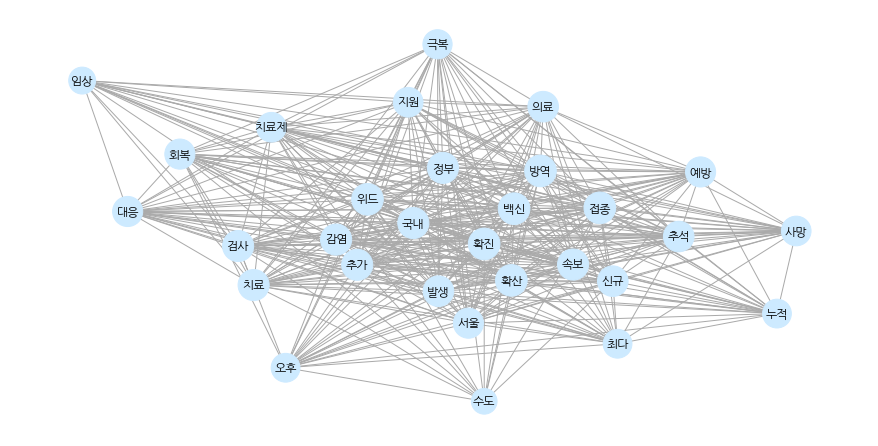

<<table_4 이미지 저장 완료 >>


<Figure size 864x432 with 0 Axes>

In [64]:
## 노드 크기 결정
size = [G.nodes[node]['nodesize'] * 1000 for node in G]

options = {
    'node_color': '#CDEAFF',
    'edge_color': '#aaa',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

## 폰트 설정을 위한 font_manager import
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

## 폰트 설정
# plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('font', family='NanumGothic') ## 글꼴

## 
nx.draw(G, 
        node_size=size,
        #pos=nx.spring_layout(G, k=5.2, iterations=100),
        pos=nx.spring_layout(G, k=10, iterations=100),
        #pos=nx.spring_layout(G),
        #pos=nx.shell_layout(G),
        **options,
        # font_family='Malgun Gothic',
        font_family='NanumGothic',
        #alpha=0.8,
        #cmap=plt.cm.cmap_d,
       )

ax = plt.gca()
# ax.collections[0].set_edgecolor('#eee')
plt.show()
plt.savefig('network.svg')
print('<<table_4 이미지 저장 완료 >>')